In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = False))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 100, Accuracy: 0.8271604938271605, Loss: 0.6557730215567129
Checkpoint 200, Accuracy: 0.8333333333333334, Loss: 0.6621894130000362
Checkpoint 300, Accuracy: 0.8333333333333334, Loss: 0.6525185902913412
Checkpoint 400, Accuracy: 0.8395061728395061, Loss: 0.6596801899097584
Checkpoint 500, Accuracy: 0.8333333333333334, Loss: 0.6599395893238209


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.895796  ]
 [0.07197113]
 [0.03223289]]
[1. 0. 0.] <-> [[0.5473462 ]
 [0.3629967 ]
 [0.08965712]]
[1. 0. 0.] <-> [[0.90320456]
 [0.06769678]
 [0.02909872]]
[1. 0. 0.] <-> [[0.90093446]
 [0.06896948]
 [0.03009604]]
[1. 0. 0.] <-> [[0.8905386 ]
 [0.07530512]
 [0.03415624]]
[1. 0. 0.] <-> [[0.847385  ]
 [0.10739667]
 [0.04521839]]
[1. 0. 0.] <-> [[0.84288013]
 [0.11092184]
 [0.04619797]]
[0. 1. 0.] <-> [[0.014499  ]
 [0.38519928]
 [0.60030174]]
[1. 0. 0.] <-> [[0.9037802 ]
 [0.06737723]
 [0.02884251]]
[0. 0. 1.] <-> [[0.64630634]
 [0.19541836]
 [0.15827526]]
[1. 0. 0.] <-> [[0.908921  ]
 [0.06456442]
 [0.0265146 ]]
[1. 0. 0.] <-> [[0.86132556]
 [0.0966187 ]
 [0.04205581]]
[0. 1. 0.] <-> [[0.6697149 ]
 [0.18310522]
 [0.14717986]]
[1. 0. 0.] <-> [[0.8871358 ]
 [0.07760146]
 [0.03526273]]
[0. 0. 1.] <-> [[0.42117748]
 [0.47594675]
 [0.1028758 ]]
[1. 0. 0.] <-> [[0.75491315]
 [0.13901486]
 [0.10607202]]
[1. 0. 0.] <-> [[0.8815026 ]
 [0.08156894]
 [0.03692844]]
[1. 0. 0.] <->

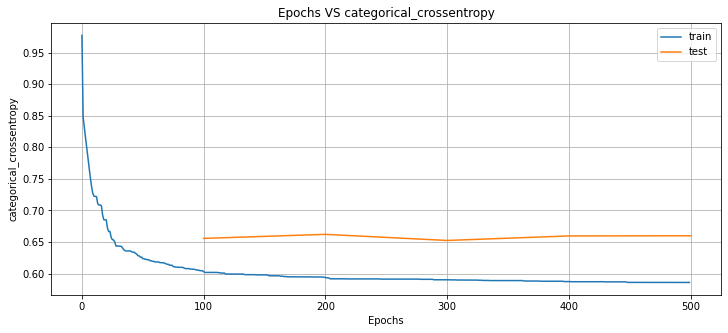

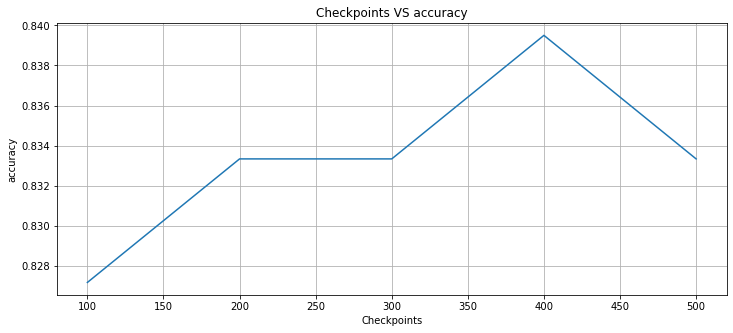

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8271604938271605, 'mean_square_error': 2.927334066088492, 'categorical_crossentropy': 0.6557730215567129, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 22, 'tn_hit': 8, 'fn_hit': 1}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 16}, 2: {'tp_hit': 3, 'fp_hit': 6, 'tn_hit': 88, 'fn_hit': 11}}, 'checkpoint': 100} 


{'accuracy': 0.8333333333333334, 'mean_square_error': 2.947026181644619, 'categorical_crossentropy': 0.6621894130000362, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 23, 'tn_hit': 7, 'fn_hit': 0}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 16}, 2: {'tp_hit': 3, 'fp_hit': 4, 'tn_hit': 90, 'fn_hit': 11}}, 'checkpoint': 200} 


{'accuracy': 0.8333333333333334, 'mean_square_error': 2.967954744671562, 'categorical_crossentropy': 0.6525185902913412, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 23, 'tn_hit': 7, 'fn_hit': 0}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 16}, 2: {'tp_hit': 3, 'fp_hit': 4, 'tn_hit': 90, 'fn_hit':

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[[-2.402635  ]
 [ 0.02248125]
 [ 0.78559554]
 [-0.18517056]
 [-0.01734093]]
 bias: [3.]

Neuron 1: weights:
[[1.3649672 ]
 [1.3850176 ]
 [2.4810195 ]
 [0.39851546]
 [1.4169058 ]]
 bias: [0.73412204]

Neuron 2: weights:
[[1.433222 ]
 [1.0357413]
 [3.       ]
 [3.       ]
 [1.7077514]]
 bias: [-2.4612224]

Neuron 3: weights:
[[ 1.0885112 ]
 [-0.88413537]
 [-2.0428805 ]
 [ 0.7751848 ]
 [ 1.5914292 ]]
 bias: [-1.9686648]

$
Layer 2
Neuron 0: weights:
[[ 3.       ]
 [-1.5859449]
 [ 2.1211889]
 [-3.       ]]
 bias: [-0.5643549]

Neuron 1: weights:
[[-1.951851  ]
 [ 2.1381235 ]
 [-1.6970665 ]
 [-0.51205117]]
 bias: [1.6329855]

Neuron 2: weights:
[[-1.6513336 ]
 [ 0.70041054]
 [ 0.07777485]
 [ 2.2282593 ]]
 bias: [0.32709605]

$

